In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

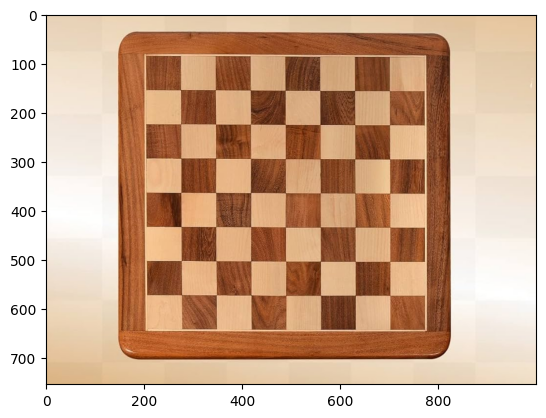

In [3]:
flat_chess = cv2.imread('media/flat_chessboard.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

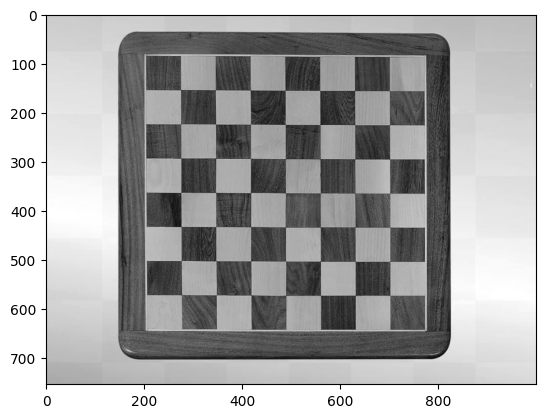

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY) #gri formata çevirme
plt.imshow(gray_flat_chess,cmap="gray")

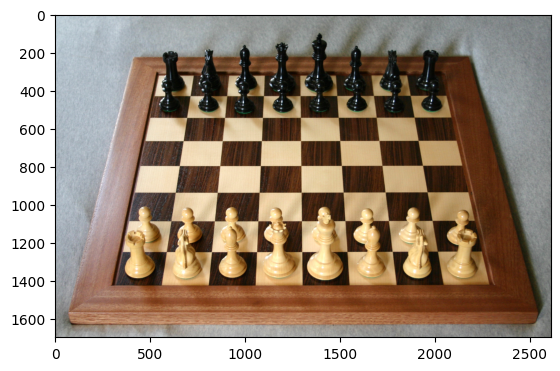

In [5]:
real_chess = cv2.imread('media/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

In [6]:
gray_flat_chess

array([[205, 205, 205, ..., 188, 188, 188],
       [205, 205, 205, ..., 188, 188, 188],
       [205, 205, 205, ..., 188, 188, 188],
       ...,
       [171, 171, 171, ..., 216, 216, 216],
       [171, 171, 171, ..., 216, 216, 216],
       [171, 171, 171, ..., 216, 216, 216]], dtype=uint8)

In [7]:
gray = np.float32(gray_flat_chess) #float32 formatına çevirme

In [8]:
gray

array([[205., 205., 205., ..., 188., 188., 188.],
       [205., 205., 205., ..., 188., 188., 188.],
       [205., 205., 205., ..., 188., 188., 188.],
       ...,
       [171., 171., 171., ..., 216., 216., 216.],
       [171., 171., 171., ..., 216., 216., 216.],
       [171., 171., 171., ..., 216., 216., 216.]], dtype=float32)

In [9]:
gray.shape

(754, 1000)

In [11]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04) #köşeleri bulma


In [12]:
dst = cv2.dilate(dst,None) #köşeleri belirginleştirme

In [13]:
flat_chess[dst>0.01*dst.max()]= (255,0,0) #piksel degeri 0.01 den buyuk olanlari kirmizi yapma

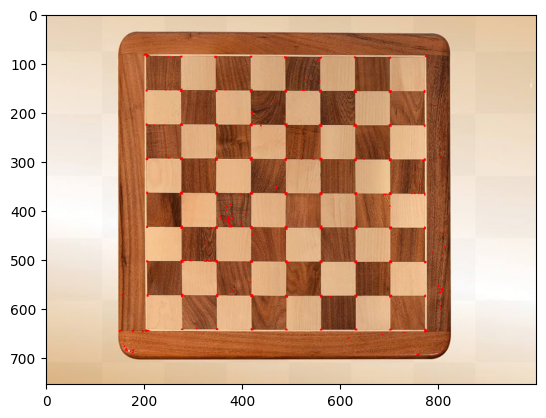

In [14]:
plt.imshow(flat_chess)

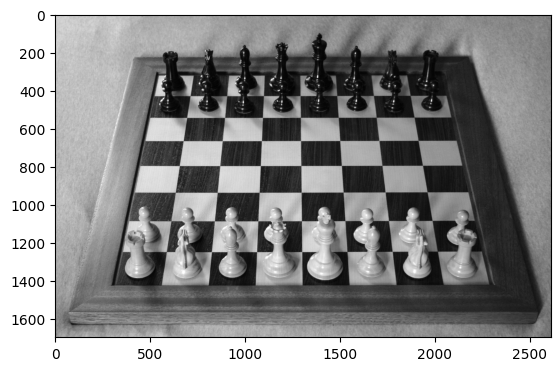

In [15]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap="gray")

In [16]:
gray_real_chess

array([[212, 212, 210, ..., 118, 117, 120],
       [213, 213, 210, ..., 120, 120, 122],
       [211, 213, 210, ..., 122, 122, 122],
       ...,
       [129, 131, 132, ..., 110, 111, 115],
       [129, 135, 140, ..., 110, 109, 108],
       [128, 136, 145, ..., 112, 108, 103]], dtype=uint8)

In [17]:
gray_real = np.float32(gray_real_chess)

In [19]:
gray_real

array([[212., 212., 210., ..., 118., 117., 120.],
       [213., 213., 210., ..., 120., 120., 122.],
       [211., 213., 210., ..., 122., 122., 122.],
       ...,
       [129., 131., 132., ..., 110., 111., 115.],
       [129., 135., 140., ..., 110., 109., 108.],
       [128., 136., 145., ..., 112., 108., 103.]], dtype=float32)

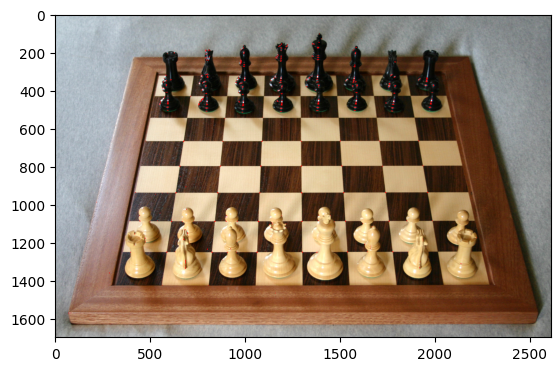

In [21]:
dst = cv2.cornerHarris(src=gray_real,blockSize=2,ksize=3,k=0.04) #köşeleri bulma
dst = cv2.dilate(dst,None) #köşeleri belirginleştirme
real_chess[dst>0.01*dst.max()]= (255,0,0) #piksel degeri 0.01 den buyuk olanlari kirmizi yapma
plt.imshow(real_chess)

In [22]:
flat_chess = cv2.imread('media/flat_chessboard.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

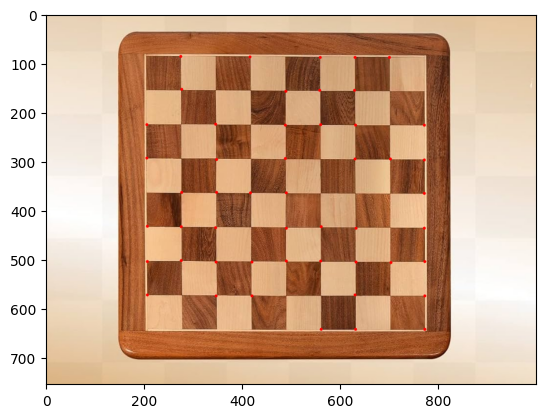

In [28]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess,50,0.01,10) #köşeleri bulma
corners= np.intp(corners) #int formatına çevirme

for i in corners: #köşeleri çizme
    (x,y) = i.ravel() #x ve y koordinatlarını al
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1) #köşeleri çiz

    plt.imshow(flat_chess)

In [29]:
real_chess = cv2.imread('media/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)



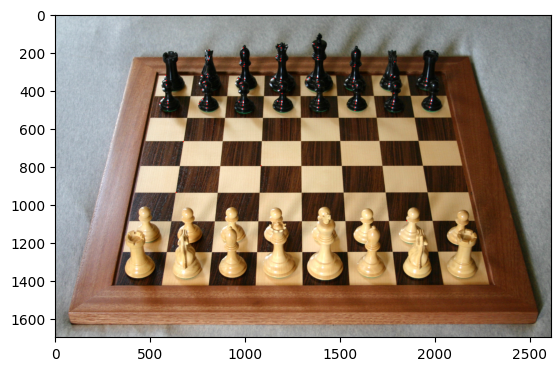

In [31]:
corners=cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10) #köşeleri bulma
corners= np.intp(corners) #int formatına çevirme

for i in corners: #köşeleri çizme
    (x,y) = i.ravel() #x ve y koordinatlarını al
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1) #köşeleri çiz

    plt.imshow(real_chess)